Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.


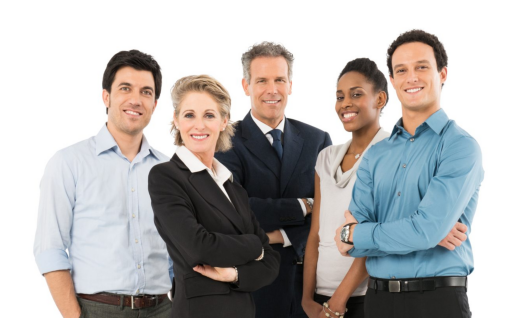

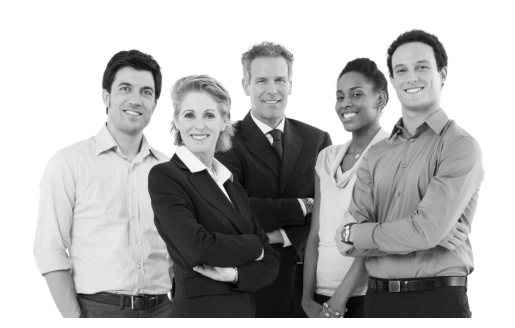

Faces encontradas:  7


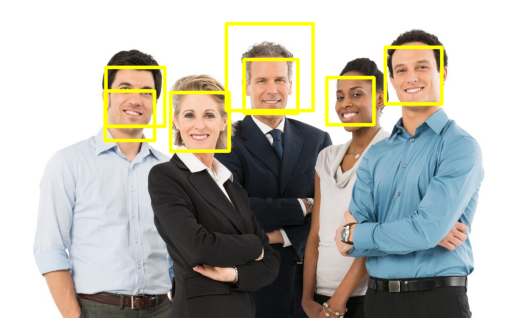

In [ ]:
# Importa a biblioteca openCV
# !pip3 install opencv-python
import matplotlib.pyplot as plt
import cv2

# Carrega a imagem "PessoaDesconhecida.jpg" na variável img e mostra a imagem
img = cv2.imread("PessoaDesconhecida.jpg")
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

# Transforma a imagem em tons de cinza, o que facilita a aplicação
imgPB = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(imgPB, cmap='gray')
plt.axis('off')
plt.show()

# Cria um objeto do classificador usando seu construtor
# O parâmetro recebido pelo construtor é o endereço do arquivo xml
# que guarda os padrões de identificação
df = cv2.CascadeClassifier(cv2.data.haarcascades +
'haarcascade_frontalface_default.xml')

# Utiliza função de detecção a partir do objeto df
faces = df.detectMultiScale(imgPB, scaleFactor=1.05, minNeighbors=7,minSize=(30,30), flags = cv2.CASCADE_SCALE_IMAGE)
if len(faces) > 0:
  print("Faces encontradas: ", len(faces))
else:
  print("Nenhuma face encontrada")

# Desenha retângulos amarelos nas posições em que foram encontradas
for(x,y,w,h) in faces:
  cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,255), 7)

# Mostra a imagem atualizada com a marcação dos locais onde foram
# encontradas faces
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
import cv2
# Utiliza o construtor CascadeClassifier para criar o objeto df,
# que guarda as funções de um algoritmo de classificação em cascata
df = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


# Cria o objeto de camera considerando um arquivo de vídeo
camera = cv2.VideoCapture(0)


# Cria o objeto camera considerando a webcam do computador
#camera = cv2.VideoCapture(0)
# A função .read() retorna dois valores: 1- Um valor booleano
# identificando se um frame foi encontrado;
# 2- Uma matriz de pixels representando o frame do vídeo que
# foi encontrado
while True:
  (sucesso, frame) = camera.read()
  if not sucesso: #final do video
    break


  # Converte o frame para tons de cinza
  frame_pb = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
                          

  # Detecta as faces no frame
  faces = df.detectMultiScale(frame_pb, scaleFactor = 1.1, minNeighbors=15, minSize=(30,30), flags=cv2.CASCADE_SCALE_IMAGE)


  # Faz uma cópia do frame
  frame_temp = frame.copy()


  # Desenha retângulos amarelos, na imagem frame_temp, nas
  # posições onde foram encontradas faces
  for (x, y, lar, alt) in faces:
    cv2.rectangle(frame_temp, (x, y), (x + lar, y + alt), (0, 255, 255), 2)
    cv2.imshow("Encontrando faces...", frame_temp)
  # Espera que a tecla 's' seja pressionada para sair
    if cv2.waitKey(1) & 0xFF == ord("s"):
      break


# Desaloca a memória do objeto camera e fecha todas as janelas
# abertas pela biblioteca OpenCV
camera.release()
cv2.destroyAllWindows()

: 

In [ ]:
import cv2

# Carrega o classificador de faces pré-treinado
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Inicializa a captura da webcam (0 = câmera padrão)
camera = cv2.VideoCapture(0)

if not camera.isOpened():
    print("Erro: Não foi possível acessar a câmera.")
    exit()

while True:
    # Captura frame por frame
    ret, frame = camera.read()
    
    if not ret:
        print("Erro: Não foi possível capturar o frame.")
        break

    # Converte para tons de cinza (necessário para a detecção)
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detecta faces no frame
    faces = face_cascade.detectMultiScale(
        gray,
        scaleFactor=1.1,
        minNeighbors=15,
        minSize=(30, 30),
        flags=cv2.CASCADE_SCALE_IMAGE
    )

    # Desenha retângulos ao redor das faces detectadas
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 255), 7)

    # Mostra o frame resultante
    cv2.imshow('Detecção de Faces', frame)

    # Pressione 's' para sair
    if cv2.waitKey(1) & 0xFF == ord('s'):
        break

# Libera a câmera e fecha as janelas
camera.release()
cv2.destroyAllWindows()

: 